In [1]:
import sys
from Global_Functions import Functions as F
from Global_Functions import LDV as ldv
from Global_Functions import Plotter as Plotter
from Global_Functions import *


In [2]:
def create_plots_metrics(metric_list,Q,ylabel='',label='',xlabel='',title='',Daylight=False,Distance_Optimal=False,
Imrovenent_over_std_app=False,metric2nd_list=None,legend=False,ax=None,idx=None,color=None,marker=None,transparency=1):
        try:
            df=Plotter.create_df_plotly(metric_list,Q)
        except:
            df=Plotter.create_df_plotly(metric_list.T,Q)

        x=Q
        means=np.array(df.mean())
        upperbound=df.where(df>=means)
        lowerbound=df.where(df<means)
        upper_std=upperbound.std()
        lower_std=lowerbound.std()
        if Daylight:
            df_day=Plotter.create_df_plotly(metric_list,Q,daylight=Daylight)
        plt.title(title)
        if Distance_Optimal:
            plt.title(f'{title} - Distance Optimal')
            if metric2nd_list is not None:
                try:
                    df2nd=Plotter.create_df_plotly(metric2nd_list,Q)
                except:
                    df2nd=Plotter.create_df_plotly(metric2nd_list.T,Q)
                if Daylight:
                    df2nd_day=Plotter.create_df_plotly(metric2nd_list,Q,daylight=Daylight)
                    plt.plot((1-df_day.mean()-(1-df2nd_day.mean()))/(1-df_day.mean()),label='Reduction of distance to optimal Daylight')
    
                if ax:
                    ax[idx].plot((1-df.mean()-(1-df2nd.mean()))/(1-df.mean()),label='Reduction of distance to optimal')
                else:
                    plt.plot((1-df.mean()-(1-df2nd.mean()))/(1-df.mean()),label='Reduction of distance to optimal Ratio')
               
            else:
                plt.plot(1-df.mean(),label=f'{xlabel}')
                if Daylight:
                    plt.plot(1-df_day.mean(),label=f'Daylight {label}')
        elif Imrovenent_over_std_app:
            if metric2nd_list is not None:
                try:
                    df2nd=Plotter.create_df_plotly(metric2nd_list,Q)
                except:
                    df2nd=Plotter.create_df_plotly(metric2nd_list.T,Q)
                
                if Daylight:
                    df2nd_day=Plotter.create_df_plotly(metric2nd_list,Q,daylight=Daylight)
                    plt.plot((df2nd_day.mean()-df_day.mean())/df_day.mean(),label='Improvement over standard approach Daylight')
                
                else:
                    if np.any(ax!=None):
                        Improvement=(df2nd.mean()-df.mean())/df.mean()
                        ax[idx].plot(Improvement,label=label,marker=marker,color=color,alpha=transparency)
                    else:

                        plt.plot((df2nd.mean()-df.mean())/df.mean(),label='Improvement over standard approach')
    
            else:
                plt.plot(1-df.mean(),label=f' {label}')
                if Daylight:
                    plt.plot(1-df_day.mean(),label=f'Daylight {label}')
        else:
            if np.any(ax!=None):
                ax[idx].plot(df.mean(),label=f'{label}',color=color,marker=marker,alpha=transparency)
                ax[idx].fill_between(x, means- lower_std, means + upper_std, color=color, alpha=0.2)
            else:
                plt.plot(df.mean(),label=f' {label}',marker='o')
            if Daylight:
                plt.plot(df_day.mean(),label=f'Daylight {label}',marker='o')
        if ylabel:
            if np.any(ax!=None):
                ax[idx].set_ylabel(ylabel)
            else:

                plt.ylabel(ylabel)
        if xlabel:
            if np.any(ax!=None):
                ax[idx].set_xlabel(xlabel)
            else:
                plt.xlabel(xlabel)
  
        if legend:
            if np.any(ax!=None):
                ax[idx].legend()
            else:
                plt.legend()


        
           

In [3]:
def save_x_y_data(lines1,lines2,lines3,exp,typess):
    x1=lines1.get_xdata()
    y1=lines1.get_ydata()
    y2=lines2.get_ydata()
    y3=lines3.get_ydata()
    df=pd.DataFrame({'SP':y1,'OB':y2, 'improvement over standard approach': y3},index=x1)
    Savepath=f'{Filesave}/csv'
    
    if not os.path.exists(Savepath):
        os.makedirs(Savepath)
    df.to_csv(f'{Savepath}/{exp}_x_y_data_{typess}.csv')

In [4]:
def savefigs_all_formats(Filesave_path,fig_name):
    png_fpath=f'{Filesave_path}/png/'
    if not os.path.exists(png_fpath):
        os.makedirs(png_fpath)
    pdf_fpath=f'{Filesave_path}/pdf/'
    if not os.path.exists(pdf_fpath):
        os.makedirs(pdf_fpath)
    eps_fpath=f'{Filesave_path}/eps/'
    if not os.path.exists(eps_fpath):
        os.makedirs(eps_fpath)
    plt.savefig(f'{png_fpath}/{fig_name}.png',dpi=300)
    plt.savefig(f'{pdf_fpath}/{fig_name}.pdf')
    plt.savefig(f'{eps_fpath}/{fig_name}.eps')

In [5]:
def Q_Plotter(Q,SP_list_NORM,OB_list_NORM,SP_list_Not_Norm,OB_list_Not_Norm,title='',ylabel='',vline=True,loc=None,typess='p',y_Range=None,marker='o',Experiment=None):
    fig,ax= plt.subplots(2,1,figsize=(13,10))
    fig.suptitle(title)
    OB_label=r'$\bar{D}_{p}$'.replace('p',typess)
    SP_label=r'$\bar{D}_{p}^{(P)}$'.replace('p',typess)

    create_plots_metrics(SP_list_NORM,Q,ax=ax,idx=0,label=SP_label,color='blue',marker=marker)
    create_plots_metrics(OB_list_NORM,Q,ax=ax,idx=0,label=OB_label,color='orange',marker=marker)
    ax[0].set_xticks(np.linspace(0,1,11))
    ax[0].grid(axis='y')
    ax[0].set_ylabel(ylabel)
    ax[1].set_xlabel(r'$M_{s} / c_{OPEX}$')
    ax[0].tick_params('x',labelrotation=-60)
    ax[0].set_ylim([0,1.05])
    ax[0].legend(fontsize=20,loc=loc)

    lines1=ax[0].lines[0]
    lines2=ax[0].lines[1]

    labels=r'$\bar{G}_{p}$'.replace('p',typess)
    create_plots_metrics(SP_list_Not_Norm,Q,Imrovenent_over_std_app=True,metric2nd_list=OB_list_Not_Norm,ax=ax,idx=1,marker=marker,label=labels)

    lines=ax[1].lines[0]
    lines3=lines
    ymax=lines.get_ydata().max()+1
    ymin=lines.get_ydata().min()-0.1
    if y_Range:
        ymax=lines.get_ydata().max()+0.1
        ymin=ymax-y_Range

    if ymin<0:
        ymin=0
        ymax=y_Range
    ax[1].set_xticks(np.linspace(0,1,11))
    ax[1].grid(axis='y')
    ax[1].tick_params('x',labelrotation=-60)
    #ax[1].set_ylim([ymin,ymax])
    #ax[1].set_yscale('log')
    #ax[1].set_ylabel(r'$\bar{G}_{p}$'.replace('p',typess))
    #  
    ax[1].legend(fontsize=20)
    fig.tight_layout()

    save_x_y_data(lines1,lines2,lines3,Experiment+'_Q',typess)
  

In [6]:
time_decision_NP=[5,15,30,60,120]
time_admission=[120]
Simulations=[]
duration_list=[]
for i in range(len(time_decision_NP)):
    Simulations.append(f'T_dec_{time_decision_NP[i]}_Tadm_{time_admission[0]}')
    duration_list.append(time_decision_NP[i])

## Tadm Variation Benchmark

SYNTHETIC

In [7]:
All_results_list_pred=[]
SLA=F.plot_5x
Ctot_ratio=1
Q_list=SimulationsSLA=F.plot_5x

Tslots=9480
ratio_cost_rev=0.9
q=ratio_cost_rev
time_decision_NP=[5,15,30,60,120]
pred_traf=False
#Fpath_Dataset='./data/npys/0_Forecasting_OPT/'
for i in tqdm(range(len(Simulations))):
    
    Fpath_Dataset=f'./Syn_Dataset/npys/Fcasting_exps_Synthetic_data_noisy/120/RRA/{Simulations[i]}/'
 

    Fpath_Variables=f'./Syn_Dataset/OPT_npys/Fcasting_exps_Synthetic_data_noisy/120/RRA_OR/Ratio_0.9/{Simulations[i]}/'
  

    all_results=ldv.load_dataset_variables(Fpath_Dataset,Fpath_Variables,Tslots,SLA,Tdec_OB=duration_list[i],output='All_results',Predictions=pred_traf,synthetic=True,q=q,Bss_type=False)
    All_results_list_pred.append(all_results)
    

  0%|          | 0/5 [00:00<?, ?it/s]/home/jupyter-salcala/kaNSaaS-Slicing/Global_Functions.py:983: RuntimeWarning: invalid value encountered in scalar divide
  Ratio_known_Optimal=mean_known/mean_Optimal
/home/jupyter-salcala/kaNSaaS-Slicing/Global_Functions.py:983: RuntimeWarning: divide by zero encountered in scalar divide
  Ratio_known_Optimal=mean_known/mean_Optimal
100%|██████████| 5/5 [00:18<00:00,  3.69s/it]


In [24]:
All_results_list_pred=[]
SLA=F.plot_5x
Ctot_ratio=1
Q_list=SimulationsSLA=F.plot_5x

Tslots=9480
ratio_cost_rev=0.9
q=ratio_cost_rev
time_decision_NP=[5,15,30,60,120]
pred_traf=False
#Fpath_Dataset='./data/npys/0_Forecasting_OPT/'
for i in tqdm(range(len(Simulations))):
    
    Fpath_Dataset=f'./Syn_Dataset/Synthetic_Benchmark_noisy/{Simulations[i]}/'
    #print(Fpath_Dataset)

    Fpath_Variables=f'./Syn_Dataset/OPT_npys/Fcasting_exps_Synthetic_data_noisy/120/RRA_OR/Ratio_0.9/{Simulations[i]}/'    #print(time_decision_NP_s)
    #print(Fpath_Variables)

    all_results=ldv.load_dataset_variables_benchmark(Fpath_Dataset,Fpath_Variables,Tslots,SLA,Tdec_OB=duration_list[i],output='All_results',Predictions=pred_traf,synthetic=True,q=q,Bss_type=False)
    All_results_list_pred.append(all_results)
    

100%|██████████| 5/5 [00:29<00:00,  5.82s/it]


In [8]:
Net_Ben_OPT_List_SP_q_lists=[]
Net_Ben_OPT_List_OB_q_lists=[]
Net_Ben_OPT_List_TRAF_q_lists=[]
total_service_SP_pd_list=[]
total_service_OB_pd_list=[]
total_service_TRAF_pd_list=[]
NET_GAIN_list_SP_q_lists=[]
NET_GAIN_list_OB_q_lists=[]
gain_list_SP_q_lists=[]
gain_list_OB_q_lists=[]
allocated_Traffic_list_SP_q_lists=[]
allocated_Traffic_list_OB_q_lists=[]
SP_q_lists=[]
traffic_list_SP_q_lists=[]
traffic_list_OB_q_lists=[]
EuroTraff_list_SP_q_lists=[]
EuroTraff_list_OB_q_lists=[]
Alpha_SP_q_lists=[]
X_SP_q_lists=[]
Alpha_OB_q_lists=[]
X_OB_q_lists=[]
Alpha_TRAF_q_lists=[]
X_TRAF_q_lists=[]
Beta_SP_q_lists=[]
Beta_OB_q_lists=[]
Beta_TRAF_q_lists=[]
real_traffic_SP_q_lists=[]
real_traffic_OB_q_lists=[]
real_traffic_TRAF_q_lists=[]

Euro_list_SP_q_lists=[]
Euro_list_OB_q_lists=[]
Euro_list_TRAF_q_lists=[]

traffic_SP_q_lists_means_qlist=[]
traffic_OB_q_lists_means_qlist=[]
traffic_TRAF_q_lists_means_qlist=[]

NET_GAIN_SP_qlists_means=[]
NET_GAIN_OB_qlists_means=[]
NET_GAIN_TRAF_qlists_means=[]


traffic_SP_q_lists_means=[]
traffic_OB_q_lists_means=[]
traffic_TRAF_q_lists_means=[]

EuroTraff_list_SP_q_lists_means=[]
EuroTraff_list_OB_q_lists_means=[]


SLA_cost_SP_q_lists=[]
SLA_cost_OB_q_lists=[]
SLA_cost_TRAF_q_lists=[]
Copex_Cost_SP_q_lists=[]
Copex_Cost_OB_q_lists=[]
Copex_Cost_TRAF_q_lists=[]

SLA_cost_SP_metric_q_lists=[]
SLA_cost_OB_metric_q_lists=[]

SLA_cost_SP_q_lists_means=[]
SLA_cost_OB_q_lists_means=[]



Copex_Cost_SP_metric_q_lists=[]
Copex_Cost_OB_metric_q_lists=[]

Copex_Cost_SP_q_lists_means=[]
Copex_Cost_OB_q_lists_means=[]

for i in tqdm(range(len(All_results_list_pred))):
    all_results=All_results_list_pred[i]
    Net_Ben_OPT_List_SP,Net_Ben_OPT_List_OB,Net_Ben_OPT_List_TRAF=pd.DataFrame(all_results['Net_Ben_OPT_List_SP']),pd.DataFrame(all_results['Net_Ben_OPT_List_OB']),pd.DataFrame(all_results['Net_Ben_OPT_List_TRAF'])
    Net_Ben_OPT_List_SP_q_lists.append(Net_Ben_OPT_List_SP.T.sum())
    Net_Ben_OPT_List_OB_q_lists.append(Net_Ben_OPT_List_OB.T.sum())
    Net_Ben_OPT_List_TRAF_q_lists.append(Net_Ben_OPT_List_TRAF.T.sum())

    total_service_SP_pd,total_service_OB_pd,total_service_TRAF_pd=pd.DataFrame(all_results['total_service_SP_pd']),pd.DataFrame(all_results['total_service_OB_pd']),pd.DataFrame(all_results['total_service_TRAF_pd'])
    total_service_SP_pd_list.append(total_service_SP_pd.total_slices)
    total_service_OB_pd_list.append(total_service_OB_pd.total_slices)
    total_service_TRAF_pd_list.append(total_service_TRAF_pd.total_slices)
    NET_GAIN_list_SP,NET_GAIN_SP=all_results['NET_GAIN_list_SP'],all_results['NET_GAIN_SP']
    NET_GAIN_list_OB,NET_GAIN_OB=all_results['NET_GAIN_list_OB'],all_results['NET_GAIN_OB']
    NET_GAIN_list_SP_q_lists.append(NET_GAIN_list_SP)
    NET_GAIN_list_OB_q_lists.append(NET_GAIN_list_OB)
    gain_list_SP,gain_SP=(all_results['gain_list_SP']),all_results['gain_SP']
    gain_list_OB,gain_OB=(all_results['gain_list_OB']),all_results['gain_OB']
    gain_list_SP_q_lists.append(gain_list_SP)
    gain_list_OB_q_lists.append(gain_list_OB)
    allocated_Traffic_list_SP,allocated_Traffic_SP=(all_results['allocated_Traffic_list_SP']),all_results['allocated_Traffic_SP']
    allocated_Traffic_list_OB,allocated_Traffic_OB = (all_results['allocated_Traffic_list_OB']),all_results['allocated_Traffic_OB']
    allocated_Traffic_list_SP_q_lists.append(allocated_Traffic_list_SP)
    allocated_Traffic_list_OB_q_lists.append(allocated_Traffic_list_OB)


    real_traffic_SP_pd,real_traffic_OB_pd,real_traffic_TRAF_pd=pd.DataFrame(all_results['real_traffic_SP_pd']),pd.DataFrame(all_results['real_traffic_OB_pd']),pd.DataFrame(all_results['real_traffic_TRAF_pd'])
    real_traffic_SP_q_lists.append(real_traffic_SP_pd.T.sum())
    real_traffic_OB_q_lists.append(real_traffic_OB_pd.T.sum())
    real_traffic_TRAF_q_lists.append(real_traffic_TRAF_pd.T.sum())

    traffic_list_SP,traffic_SP=(all_results['traffic_list_SP']),all_results['traffic_SP']
    traffic_list_OB,traffic_OB=(all_results['traffic_list_OB']),all_results['traffic_OB']
    EuroTraff_list_SP,EuroTraff_SP=(all_results['EuroTraff_list_SP']),all_results['EuroTraff_SP']
    EuroTraff_list_OB,EuroTraff_OB=(all_results['EuroTraff_list_OB']),all_results['EuroTraff_OB']
    traffic_list_SP_q_lists.append(traffic_list_SP)
    traffic_list_OB_q_lists.append(traffic_list_OB)
    EuroTraff_list_SP_q_lists.append(EuroTraff_list_SP)
    EuroTraff_list_OB_q_lists.append(EuroTraff_list_OB)

   
    NET_GAIN_SP_qlists_means.append(NET_GAIN_SP)
    NET_GAIN_OB_qlists_means.append(NET_GAIN_OB)



    traffic_SP_q_lists_means.append(traffic_SP)
    traffic_OB_q_lists_means.append(traffic_OB)
 

    EuroTraff_list_SP_q_lists_means.append(EuroTraff_SP)
    EuroTraff_list_OB_q_lists_means.append(EuroTraff_OB)

  

    Euro_list_SP,Euro_SP=(all_results['Euro_list_SP']),all_results['Euro_SP']
    Euro_list_OB,Euro_OB=(all_results['Euro_list_OB']),all_results['Euro_OB']
    Euro_list_TRAF,Euro_TRAF=(all_results['Euro_list_TRAF']),all_results['Euro_TRAF']
    Euro_list_SP_q_lists.append(Euro_list_SP)
    Euro_list_OB_q_lists.append(Euro_list_OB)
    Euro_list_TRAF_q_lists.append(Euro_list_TRAF)


    SLA_cost_SP_q_lists.append(all_results['SLA_Cost_SP'])
    SLA_cost_OB_q_lists.append(all_results['SLA_Cost_OB'])
    SLA_cost_TRAF_q_lists.append(all_results['SLA_Cost_TRAF'])
    Copex_Cost_SP_q_lists.append(all_results['Copex_Cost_SP'])
    Copex_Cost_OB_q_lists.append(all_results['Copex_Cost_OB'])
    Copex_Cost_TRAF_q_lists.append(all_results['Copex_Cost_TRAF'])
    SLA_cost_SP_metric_q_lists.append(all_results['SLA_Cost_Metric_list_SP'])
    SLA_cost_OB_metric_q_lists.append(all_results['SLA_Cost_Metric_list_OB'])
    SLA_cost_SP_q_lists_means.append(all_results['SLA_Cost_Metric_SP'])
    SLA_cost_OB_q_lists_means.append(all_results['SLA_Cost_Metric_OB'])
  

    Copex_Cost_SP_metric_q_lists.append(all_results['Copex_cost_Metric_list_SP'])
    Copex_Cost_OB_metric_q_lists.append(all_results['Copex_cost_Metric_list_OB'])
    Copex_Cost_SP_q_lists_means.append(all_results['Copex_cost_Metric_SP'])
    Copex_Cost_OB_q_lists_means.append(all_results['Copex_cost_Metric_OB'])

    Beta_SP_q_lists.append(all_results['Beta_SP'])
    Beta_OB_q_lists.append(all_results['Beta_OB'])
    Beta_TRAF_q_lists.append(all_results['Beta_TRAF'])



  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 11.13it/s]


# Benchmark

### Q analysis

In [10]:
#### Synthetic Data Benchmark ####
Q_list=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.99]

All_results_list_pred=[]
    

Fpath_Dataset='./Syn_Dataset/Synthetic_Benchmark_noisy/T_dec_30_Tadm_120/'
#Fpath_Variables='data/OPT_npys/Tadm_variation_preds_Dataset/120/RRA/Ratio_0.9/T_dec_30_Tadm_120/'
Tdec_OB=30

Tslots=9480
SLA=F.plot_5x
Ctot_ratio=1
pred_traf=False
synthetic=True
for q in tqdm(Q_list):
    Fpath_Variables=f'./Syn_Dataset/OPT_npys/Fcasting_exps_Synthetic_data_noisy/120/RRA_OR/Ratio_{q}/T_dec_30_Tadm_120/'
    
    
    
    all_results=ldv.load_dataset_variables_benchmark(Fpath_Dataset,Fpath_Variables,Tslots,SLA,Tdec_OB=Tdec_OB,output='All_results',q=q,synthetic=synthetic)
    All_results_list_pred.append(all_results)

100%|██████████| 21/21 [01:33<00:00,  4.46s/it]


In [15]:
### Synthetic Traffic ###

Q_list=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.99]
All_results_list_pred=[]
Fpath_Dataset='./Syn_Dataset/npys/Fcasting_exps_Synthetic_data_noisy/120/RRA/T_dec_30_Tadm_120/'
Tslots=9481
SLA=F.plot_5x
Ctot_ratio=1
pred_traf=False
synt_traf=True
for q in tqdm(Q_list):
    Fpath_Variables=f'./Syn_Dataset/OPT_npys/Fcasting_exps_Synthetic_data_noisy/120/RRA_OR/Ratio_{q}/T_dec_30_Tadm_120/'
    all_results=ldv.load_dataset_variables(Fpath_Dataset,Fpath_Variables,Tslots,SLA,output='All_results',Predictions=pred_traf,synthetic=synt_traf,q=q)
    All_results_list_pred.append(all_results)

  0%|          | 0/21 [00:00<?, ?it/s]/home/jupyter-salcala/kaNSaaS-Slicing/Global_Functions.py:973: RuntimeWarning: divide by zero encountered in scalar divide
  Ratio_known_Optimal=mean_known/mean_Optimal
/home/jupyter-salcala/kaNSaaS-Slicing/Global_Functions.py:973: RuntimeWarning: invalid value encountered in scalar divide
  Ratio_known_Optimal=mean_known/mean_Optimal
100%|██████████| 21/21 [01:17<00:00,  3.68s/it]


In [11]:
SP_q_lists=[]
OB_q_lists=[]
TRAFF_q_lists=[]
Net_Ben_OPT_List_SP_q_lists=[]
Net_Ben_OPT_List_OB_q_lists=[]
Net_Ben_OPT_List_TRAF_q_lists=[]
total_service_SP_pd_list=[]
total_service_OB_pd_list=[]
total_service_TRAF_pd_list=[]
NET_GAIN_list_SP_q_lists=[]
NET_GAIN_list_OB_q_lists=[]
gain_list_SP_q_lists=[]
gain_list_OB_q_lists=[]
allocated_Traffic_list_SP_q_lists=[]
allocated_Traffic_list_OB_q_lists=[]
SP_q_lists=[]
traffic_list_SP_q_lists=[]
traffic_list_OB_q_lists=[]
EuroTraff_list_SP_q_lists=[]
EuroTraff_list_OB_q_lists=[]
Alpha_SP_q_lists=[]
X_SP_q_lists=[]
Alpha_OB_q_lists=[]
X_OB_q_lists=[]
Alpha_TRAF_q_lists=[]
X_TRAF_q_lists=[]
Beta_SP_q_lists=[]
Beta_OB_q_lists=[]
Beta_TRAF_q_lists=[]
real_traffic_SP_q_lists=[]
real_traffic_OB_q_lists=[]
real_traffic_TRAF_q_lists=[]

Euro_list_SP_q_lists=[]
Euro_list_OB_q_lists=[]
Euro_list_TRAF_q_lists=[]

traffic_SP_q_lists_means_qlist=[]
traffic_OB_q_lists_means_qlist=[]
traffic_TRAF_q_lists_means_qlist=[]

NET_GAIN_SP_qlists_means=[]
NET_GAIN_OB_qlists_means=[]
NET_GAIN_TRAF_qlists_means=[]

allocated_Traffic_list_SP_q_lists_means=[]
allocated_Traffic_list_OB_q_lists_means=[]


traffic_SP_q_lists_means=[]
traffic_OB_q_lists_means=[]
traffic_TRAF_q_lists_means=[]

EuroTraff_list_SP_q_lists_means=[]
EuroTraff_list_OB_q_lists_means=[]

SLA_cost_SP_q_lists=[]
SLA_cost_OB_q_lists=[]
SLA_cost_TRAF_q_lists=[]
Copex_Cost_SP_q_lists=[]
Copex_Cost_OB_q_lists=[]
Copex_Cost_TRAF_q_lists=[]

SLA_cost_SP_metric_q_lists=[]
SLA_cost_OB_metric_q_lists=[]

SLA_cost_SP_q_lists_means=[]
SLA_cost_OB_q_lists_means=[]



Copex_Cost_SP_metric_q_lists=[]
Copex_Cost_OB_metric_q_lists=[]

Copex_Cost_SP_q_lists_means=[]
Copex_Cost_OB_q_lists_means=[]



for i in tqdm(range(len(All_results_list_pred))):
    all_results=All_results_list_pred[i]
    SP_q_lists.append(all_results['SP'])
    OB_q_lists.append(all_results['OB'])
    TRAFF_q_lists.append(all_results['TRAF'])
    X_SP_q_lists.append(all_results['X_SP'])
    X_OB_q_lists.append(all_results['X_OB'])
    X_TRAF_q_lists.append(all_results['X_TRAFF'])



    Net_Ben_OPT_List_SP,Net_Ben_OPT_List_OB,Net_Ben_OPT_List_TRAF=pd.DataFrame(all_results['Net_Ben_OPT_List_SP']),pd.DataFrame(all_results['Net_Ben_OPT_List_OB']),pd.DataFrame(all_results['Net_Ben_OPT_List_TRAF'])
    Net_Ben_OPT_List_SP_q_lists.append(Net_Ben_OPT_List_SP.T.sum())
    Net_Ben_OPT_List_OB_q_lists.append(Net_Ben_OPT_List_OB.T.sum())
    Net_Ben_OPT_List_TRAF_q_lists.append(Net_Ben_OPT_List_TRAF.T.sum())
    total_service_SP_pd,total_service_OB_pd,total_service_TRAF_pd=pd.DataFrame(all_results['total_service_SP_pd']),pd.DataFrame(all_results['total_service_OB_pd']),pd.DataFrame(all_results['total_service_TRAF_pd'])
    total_service_SP_pd_list.append(total_service_SP_pd.total_slices)
    total_service_OB_pd_list.append(total_service_OB_pd.total_slices)
    total_service_TRAF_pd_list.append(total_service_TRAF_pd.total_slices)
    NET_GAIN_list_SP,NET_GAIN_SP=all_results['NET_GAIN_list_SP'],all_results['NET_GAIN_SP']
    NET_GAIN_list_OB,NET_GAIN_OB=all_results['NET_GAIN_list_OB'],all_results['NET_GAIN_OB']
    NET_GAIN_list_SP_q_lists.append(NET_GAIN_list_SP)
    NET_GAIN_list_OB_q_lists.append(NET_GAIN_list_OB)
    gain_list_SP,gain_SP=(all_results['gain_list_SP']),all_results['gain_SP']
    gain_list_OB,gain_OB=(all_results['gain_list_OB']),all_results['gain_OB']
    gain_list_SP_q_lists.append(gain_list_SP)
    gain_list_OB_q_lists.append(gain_list_OB)
    allocated_Traffic_list_SP,allocated_Traffic_SP=(all_results['allocated_Traffic_list_SP']),all_results['allocated_Traffic_SP']
    allocated_Traffic_list_OB,allocated_Traffic_OB = (all_results['allocated_Traffic_list_OB']),all_results['allocated_Traffic_OB']
    allocated_Traffic_list_SP_q_lists.append(allocated_Traffic_list_SP)
    allocated_Traffic_list_OB_q_lists.append(allocated_Traffic_list_OB)
    allocated_Traffic_list_SP_q_lists_means.append(np.mean(allocated_Traffic_list_SP))
    allocated_Traffic_list_OB_q_lists_means.append(np.mean(allocated_Traffic_list_OB))
    real_traffic_SP_pd,real_traffic_OB_pd,real_traffic_TRAF_pd=pd.DataFrame(all_results['real_traffic_SP_pd']),pd.DataFrame(all_results['real_traffic_OB_pd']),pd.DataFrame(all_results['real_traffic_TRAF_pd'])
    real_traffic_SP_q_lists.append(real_traffic_SP_pd.T.sum())
    real_traffic_OB_q_lists.append(real_traffic_OB_pd.T.sum())
    real_traffic_TRAF_q_lists.append(real_traffic_TRAF_pd.T.sum())
    traffic_list_SP,traffic_SP=(all_results['traffic_list_SP']),all_results['traffic_SP']
    traffic_list_OB,traffic_OB=(all_results['traffic_list_OB']),all_results['traffic_OB']
    EuroTraff_list_SP,EuroTraff_SP=(all_results['EuroTraff_list_SP']),all_results['EuroTraff_SP']
    EuroTraff_list_OB,EuroTraff_OB=(all_results['EuroTraff_list_OB']),all_results['EuroTraff_OB']
    traffic_list_SP_q_lists.append(traffic_list_SP)
    traffic_list_OB_q_lists.append(traffic_list_OB)
    EuroTraff_list_SP_q_lists.append(EuroTraff_list_SP)
    EuroTraff_list_OB_q_lists.append(EuroTraff_list_OB)
    NET_GAIN_SP_qlists_means.append(NET_GAIN_SP)
    NET_GAIN_OB_qlists_means.append(NET_GAIN_OB)
    traffic_SP_q_lists_means.append(traffic_SP)
    traffic_OB_q_lists_means.append(traffic_OB)
    EuroTraff_list_SP_q_lists_means.append(EuroTraff_SP)
    EuroTraff_list_OB_q_lists_means.append(EuroTraff_OB)
    Euro_list_SP,Euro_SP=(all_results['Euro_list_SP']),all_results['Euro_SP']
    Euro_list_OB,Euro_OB=(all_results['Euro_list_OB']),all_results['Euro_OB']
    Euro_list_TRAF,Euro_TRAF=(all_results['Euro_list_TRAF']),all_results['Euro_TRAF']
    Euro_list_SP_q_lists.append(Euro_list_SP)
    Euro_list_OB_q_lists.append(Euro_list_OB)
    Euro_list_TRAF_q_lists.append(Euro_list_TRAF)
    SLA_cost_SP_q_lists.append(all_results['SLA_Cost_SP'])
    SLA_cost_OB_q_lists.append(all_results['SLA_Cost_OB'])
    SLA_cost_TRAF_q_lists.append(all_results['SLA_Cost_TRAF'])
    Copex_Cost_SP_q_lists.append(all_results['Copex_Cost_SP'])
    Copex_Cost_OB_q_lists.append(all_results['Copex_Cost_OB'])
    Copex_Cost_TRAF_q_lists.append(all_results['Copex_Cost_TRAF'])
    SLA_cost_SP_metric_q_lists.append(all_results['SLA_Cost_Metric_list_SP'])
    SLA_cost_OB_metric_q_lists.append(all_results['SLA_Cost_Metric_list_OB'])
    SLA_cost_SP_q_lists_means.append(all_results['SLA_Cost_Metric_SP'])
    SLA_cost_OB_q_lists_means.append(all_results['SLA_Cost_Metric_OB'])
  

    Copex_Cost_SP_metric_q_lists.append(all_results['Copex_cost_Metric_list_SP'])
    Copex_Cost_OB_metric_q_lists.append(all_results['Copex_cost_Metric_list_OB'])
    Copex_Cost_SP_q_lists_means.append(all_results['Copex_cost_Metric_SP'])
    Copex_Cost_OB_q_lists_means.append(all_results['Copex_cost_Metric_OB'])

    Beta_SP_q_lists.append(all_results['Beta_SP'])
    Beta_OB_q_lists.append(all_results['Beta_OB'])
    Beta_TRAF_q_lists.append(all_results['Beta_TRAF'])





  0%|          | 0/21 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:01<00:00, 11.00it/s]


In [36]:
Experiments=['Synthetic_KaNSaaS_noisy','Synthetic_coNEXT_noisy']
#Experiments=['Synthetic_kansaas','Synthetic_coNEXT']
Experiment=Experiments[0]
Experiment

'Synthetic_KaNSaaS_noisy'

In [37]:
import datetime
Date=datetime.datetime.now().strftime("%d_%m_%Y")
# Date=date.today().strftime('%d_%m_%Y')
Filesave='data/Results/Figs/FINAL_PAPER/'+Date+'/'
# Date='20_02_2023'

In [18]:
Cost_x_axes= np.linspace(0,1,21)

In [19]:
Experiments=['Synthetic_KaNSaaS_noisy','Synthetic_coNEXT_noisy']
#Experiments=['Synthetic_kansaas','Synthetic_coNEXT']
Experiment=Experiments[1]

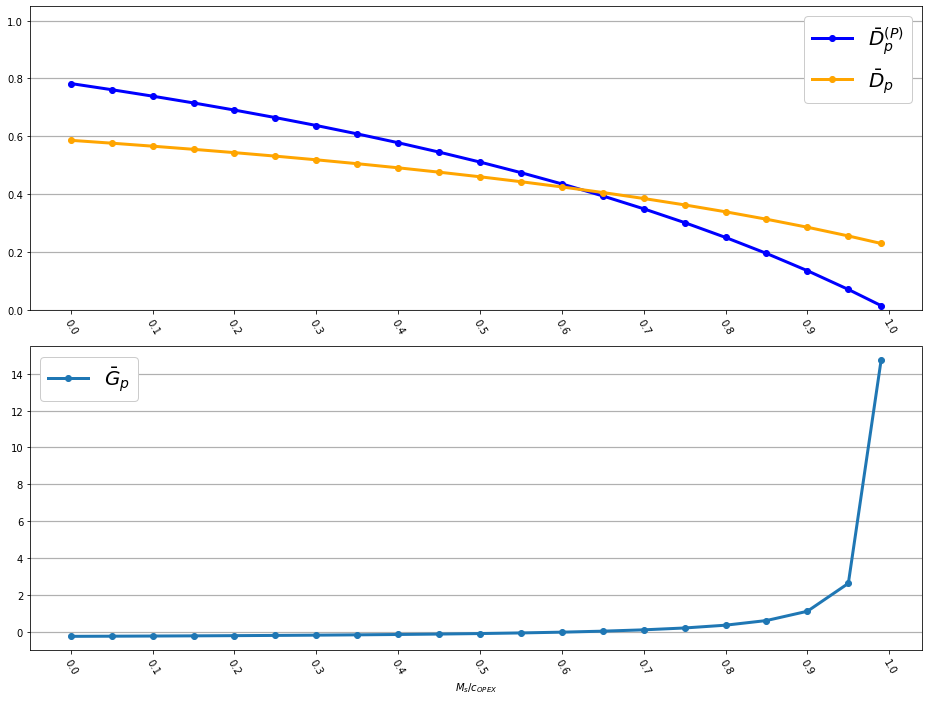

In [20]:
Q_Plotter(Q_list,NET_GAIN_SP_qlists_means,NET_GAIN_OB_qlists_means,NET_GAIN_SP_qlists_means,NET_GAIN_OB_qlists_means,typess='p',Experiment=Experiment)
#plt.savefig(f'{Filesave}/Q_Plot_p.png',dpi=300)
#savefigs_all_formats(Filesave,'Q_Plot_p')

In [22]:
Date=date.today().strftime('%d_%m_%Y')
Filesave='data/Results/Figs/FINAL_PAPER/'+Date+'/'

## Tadm analysis


In [12]:
def Tadm_Plotter(Tadm_list,SP_list_NORM,OB_list_NORM,SP_list_Not_Norm,OB_list_Not_Norm,title='',save=None,ylabel='',vline=True,loc=None,typess='p',y_Range=None,marker='o',Experiment=None):
    fig,ax= plt.subplots(2,1,figsize=(13,10))
    fig.suptitle(title)
    OB_label=r'$\bar{D}_{p}$'.replace('p',typess)
    SP_label=r'$\bar{D}_{p}^{(P)}$'.replace('p',typess)

    create_plots_metrics(SP_list_NORM,Tadm_list,ax=ax,idx=0,label=SP_label,color='blue',marker=marker)
    create_plots_metrics(OB_list_NORM,Tadm_list,ax=ax,idx=0,label=OB_label,color='orange',marker=marker)
    #ax[0].set_xticks(np.linspace(0,1,11))
    ax[0].grid(axis='y')
    ax[0].set_ylabel(ylabel)
    ax[1].set_xlabel("Orchestrator's interval [min]")
    ax[0].tick_params('x',labelrotation=-60)
    ax[0].set_ylim([0,1.05])
    ax[0].legend(loc=loc)

    lines1=ax[0].lines[0]
    lines2=ax[0].lines[1]


    labels=r'$\bar{G}_{p}$'.replace('p',typess)
    create_plots_metrics(SP_list_Not_Norm,Tadm_list,Imrovenent_over_std_app=True,metric2nd_list=OB_list_Not_Norm,ax=ax,idx=1,marker=marker,label=labels)

    lines=ax[1].lines[0]
    lines3=lines
    ymax=lines.get_ydata().max()+0.1
    ymin=lines.get_ydata().min()-0.1
    if y_Range:
        ymin=ymax-y_Range

    if ymin<0:
        ymin=0
        ymax=y_Range
    #ax[1].set_xticks(np.linspace(0,1,11))
    ax[1].grid(axis='y')
    #ax[1].set_ylim([ymin,ymax])
    ax[1].tick_params('x',labelrotation=-60)
    #ax[1].set_ylabel(r'$\bar{G}_{p}$'.replace('p',typess))
    #  
    ax[1].legend()
    fig.tight_layout()

    # save_x_y_data(lines1,lines2,lines3,Experiment+'_T_adm',typess)
    

In [9]:
Experiment='Synthetic_KaNSaaS'

In [10]:
Experiment

'Synthetic_KaNSaaS'

findfont: Font family ["'DejaVu Sans'"] not found. Falling back to DejaVu Sans.


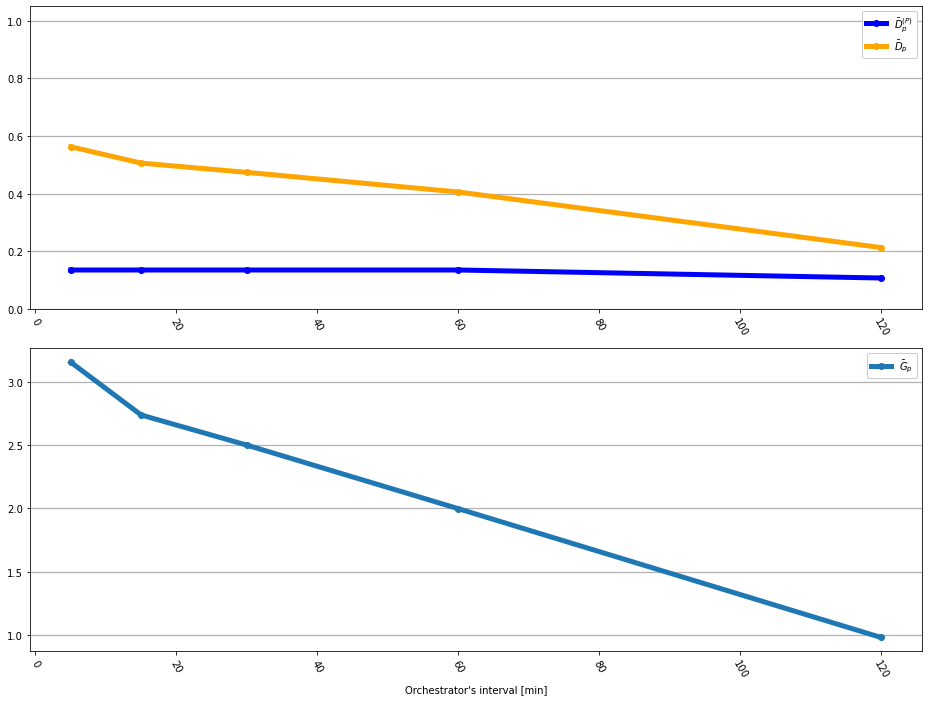

In [13]:
Tadm_Plotter(time_decision_NP,NET_GAIN_SP_qlists_means,NET_GAIN_OB_qlists_means,Net_Ben_OPT_List_SP_q_lists,Net_Ben_OPT_List_OB_q_lists,typess='p',Experiment=Experiment)
#plt.savefig(f'{Filesave}/Tadm_Plot_p.png',dpi=300)
#savefigs_all_formats(Filesave,'Tadm_Plot_p')

SYNTHETIC_ CSV FINAL PAPER

# Ctot Analyis

In [39]:
### Synthetic Traffic ###
Ctots=[0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]
Q_list=[0.9]
q=Q_list[0]
All_results_list_pred=[]
Fpath_Dataset='./Syn_Dataset/npys/Fcasting_exps_Synthetic_data_noisy/120/RRA/T_dec_30_Tadm_120/'
Tslots=9481
SLA=F.plot_5x
Ctot_ratio=1
pred_traf=False
synt_traf=True
for Ctot in tqdm(Ctots):
    Fpath_Variables=f'./Syn_Dataset/OPT_npys/Fcasting_exps_Synthetic_data_noisy/120/RRA_OR/C_TOT/C_TOT_Ratio_{Ctot}/T_dec_30_Tadm_120/'
    all_results=ldv.load_dataset_variables(Fpath_Dataset,Fpath_Variables,Tslots,SLA,output='All_results',Predictions=pred_traf,synthetic=synt_traf,q=q)
    All_results_list_pred.append(all_results)

100%|██████████| 8/8 [00:30<00:00,  3.82s/it]


In [29]:
### Benchmark Traffic ###
Ctots=[0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]
Q_list=[0.9]
q=Q_list[0]
All_results_list_pred=[]
Tslots=9481
SLA=F.plot_5x
Ctot_ratio=1
pred_traf=False
synt_traf=True
for Ctot in tqdm(Ctots):
    Fpath_Dataset=f'./Syn_Dataset/Synthetic_Benchmark_noisy/CTOT/CTOT_{Ctot}/'
    Fpath_Variables=f'./Syn_Dataset/OPT_npys/Fcasting_exps_Synthetic_data_noisy/120/RRA_OR/C_TOT/C_TOT_Ratio_{Ctot}/T_dec_30_Tadm_120/'
    all_results=ldv.load_dataset_variables_benchmark(Fpath_Dataset,Fpath_Variables,Tslots,SLA,output='All_results',Predictions=pred_traf,synthetic=synt_traf,q=q)
    All_results_list_pred.append(all_results)

 25%|██▌       | 2/8 [00:09<00:26,  4.50s/it]/home/jupyter-salcala/kaNSaaS-Slicing/Global_Functions.py:973: RuntimeWarning: invalid value encountered in scalar divide
  Ratio_known_Optimal=mean_known/mean_Optimal
/home/jupyter-salcala/kaNSaaS-Slicing/Global_Functions.py:973: RuntimeWarning: divide by zero encountered in scalar divide
  Ratio_known_Optimal=mean_known/mean_Optimal
100%|██████████| 8/8 [00:36<00:00,  4.53s/it]


In [40]:
Net_Ben_OPT_List_SP_q_lists=[]
Net_Ben_OPT_List_OB_q_lists=[]
Net_Ben_OPT_List_TRAF_q_lists=[]
total_service_SP_pd_list=[]
total_service_OB_pd_list=[]
total_service_TRAF_pd_list=[]
NET_GAIN_list_SP_q_lists=[]
NET_GAIN_list_OB_q_lists=[]
gain_list_SP_q_lists=[]
gain_list_OB_q_lists=[]
allocated_Traffic_list_SP_q_lists=[]
allocated_Traffic_list_OB_q_lists=[]
SP_q_lists=[]
traffic_list_SP_q_lists=[]
traffic_list_OB_q_lists=[]
EuroTraff_list_SP_q_lists=[]
EuroTraff_list_OB_q_lists=[]
Alpha_SP_q_lists=[]
X_SP_q_lists=[]
Alpha_OB_q_lists=[]
X_OB_q_lists=[]
Alpha_TRAF_q_lists=[]
X_TRAF_q_lists=[]
Beta_SP_q_lists=[]
Beta_OB_q_lists=[]
Beta_TRAF_q_lists=[]
real_traffic_SP_q_lists=[]
real_traffic_OB_q_lists=[]
real_traffic_TRAF_q_lists=[]

Euro_list_SP_q_lists=[]
Euro_list_OB_q_lists=[]
Euro_list_TRAF_q_lists=[]

traffic_SP_q_lists_means_qlist=[]
traffic_OB_q_lists_means_qlist=[]
traffic_TRAF_q_lists_means_qlist=[]

NET_GAIN_SP_qlists_means=[]
NET_GAIN_OB_qlists_means=[]
NET_GAIN_TRAF_qlists_means=[]


traffic_SP_q_lists_means=[]
traffic_OB_q_lists_means=[]
traffic_TRAF_q_lists_means=[]

EuroTraff_list_SP_q_lists_means=[]
EuroTraff_list_OB_q_lists_means=[]


SLA_cost_SP_q_lists=[]
SLA_cost_OB_q_lists=[]
SLA_cost_TRAF_q_lists=[]
Copex_Cost_SP_q_lists=[]
Copex_Cost_OB_q_lists=[]
Copex_Cost_TRAF_q_lists=[]

SLA_cost_SP_metric_q_lists=[]
SLA_cost_OB_metric_q_lists=[]

SLA_cost_SP_q_lists_means=[]
SLA_cost_OB_q_lists_means=[]



Copex_Cost_SP_metric_q_lists=[]
Copex_Cost_OB_metric_q_lists=[]

Copex_Cost_SP_q_lists_means=[]
Copex_Cost_OB_q_lists_means=[]

for i in tqdm(range(len(Ctots))):
    all_results=All_results_list_pred[i]
    Net_Ben_OPT_List_SP,Net_Ben_OPT_List_OB,Net_Ben_OPT_List_TRAF=pd.DataFrame(all_results['Net_Ben_OPT_List_SP']),pd.DataFrame(all_results['Net_Ben_OPT_List_OB']),pd.DataFrame(all_results['Net_Ben_OPT_List_TRAF'])
    Net_Ben_OPT_List_SP_q_lists.append(Net_Ben_OPT_List_SP.T.sum())
    Net_Ben_OPT_List_OB_q_lists.append(Net_Ben_OPT_List_OB.T.sum())
    Net_Ben_OPT_List_TRAF_q_lists.append(Net_Ben_OPT_List_TRAF.T.sum())

    total_service_SP_pd,total_service_OB_pd,total_service_TRAF_pd=pd.DataFrame(all_results['total_service_SP_pd']),pd.DataFrame(all_results['total_service_OB_pd']),pd.DataFrame(all_results['total_service_TRAF_pd'])
    total_service_SP_pd_list.append(total_service_SP_pd.total_slices)
    total_service_OB_pd_list.append(total_service_OB_pd.total_slices)
    total_service_TRAF_pd_list.append(total_service_TRAF_pd.total_slices)
    NET_GAIN_list_SP,NET_GAIN_SP=all_results['NET_GAIN_list_SP'],all_results['NET_GAIN_SP']
    NET_GAIN_list_OB,NET_GAIN_OB=all_results['NET_GAIN_list_OB'],all_results['NET_GAIN_OB']
    NET_GAIN_list_SP_q_lists.append(NET_GAIN_list_SP)
    NET_GAIN_list_OB_q_lists.append(NET_GAIN_list_OB)
    gain_list_SP,gain_SP=(all_results['gain_list_SP']),all_results['gain_SP']
    gain_list_OB,gain_OB=(all_results['gain_list_OB']),all_results['gain_OB']
    gain_list_SP_q_lists.append(gain_list_SP)
    gain_list_OB_q_lists.append(gain_list_OB)
    allocated_Traffic_list_SP,allocated_Traffic_SP=(all_results['allocated_Traffic_list_SP']),all_results['allocated_Traffic_SP']
    allocated_Traffic_list_OB,allocated_Traffic_OB = (all_results['allocated_Traffic_list_OB']),all_results['allocated_Traffic_OB']
    allocated_Traffic_list_SP_q_lists.append(allocated_Traffic_list_SP)
    allocated_Traffic_list_OB_q_lists.append(allocated_Traffic_list_OB)


    real_traffic_SP_pd,real_traffic_OB_pd,real_traffic_TRAF_pd=pd.DataFrame(all_results['real_traffic_SP_pd']),pd.DataFrame(all_results['real_traffic_OB_pd']),pd.DataFrame(all_results['real_traffic_TRAF_pd'])
    real_traffic_SP_q_lists.append(real_traffic_SP_pd.T.sum())
    real_traffic_OB_q_lists.append(real_traffic_OB_pd.T.sum())
    real_traffic_TRAF_q_lists.append(real_traffic_TRAF_pd.T.sum())

    traffic_list_SP,traffic_SP=(all_results['traffic_list_SP']),all_results['traffic_SP']
    traffic_list_OB,traffic_OB=(all_results['traffic_list_OB']),all_results['traffic_OB']
    EuroTraff_list_SP,EuroTraff_SP=(all_results['EuroTraff_list_SP']),all_results['EuroTraff_SP']
    EuroTraff_list_OB,EuroTraff_OB=(all_results['EuroTraff_list_OB']),all_results['EuroTraff_OB']
    traffic_list_SP_q_lists.append(traffic_list_SP)
    traffic_list_OB_q_lists.append(traffic_list_OB)
    EuroTraff_list_SP_q_lists.append(EuroTraff_list_SP)
    EuroTraff_list_OB_q_lists.append(EuroTraff_list_OB)

   
    NET_GAIN_SP_qlists_means.append(NET_GAIN_SP)
    NET_GAIN_OB_qlists_means.append(NET_GAIN_OB)



    traffic_SP_q_lists_means.append(traffic_SP)
    traffic_OB_q_lists_means.append(traffic_OB)
 

    EuroTraff_list_SP_q_lists_means.append(EuroTraff_SP)
    EuroTraff_list_OB_q_lists_means.append(EuroTraff_OB)

  

    Euro_list_SP,Euro_SP=(all_results['Euro_list_SP']),all_results['Euro_SP']
    Euro_list_OB,Euro_OB=(all_results['Euro_list_OB']),all_results['Euro_OB']
    Euro_list_TRAF,Euro_TRAF=(all_results['Euro_list_TRAF']),all_results['Euro_TRAF']
    Euro_list_SP_q_lists.append(Euro_list_SP)
    Euro_list_OB_q_lists.append(Euro_list_OB)
    Euro_list_TRAF_q_lists.append(Euro_list_TRAF)


    SLA_cost_SP_q_lists.append(all_results['SLA_Cost_SP'])
    SLA_cost_OB_q_lists.append(all_results['SLA_Cost_OB'])
    SLA_cost_TRAF_q_lists.append(all_results['SLA_Cost_TRAF'])
    Copex_Cost_SP_q_lists.append(all_results['Copex_Cost_SP'])
    Copex_Cost_OB_q_lists.append(all_results['Copex_Cost_OB'])
    Copex_Cost_TRAF_q_lists.append(all_results['Copex_Cost_TRAF'])
    SLA_cost_SP_metric_q_lists.append(all_results['SLA_Cost_Metric_list_SP'])
    SLA_cost_OB_metric_q_lists.append(all_results['SLA_Cost_Metric_list_OB'])
    SLA_cost_SP_q_lists_means.append(all_results['SLA_Cost_Metric_SP'])
    SLA_cost_OB_q_lists_means.append(all_results['SLA_Cost_Metric_OB'])
  

    Copex_Cost_SP_metric_q_lists.append(all_results['Copex_cost_Metric_list_SP'])
    Copex_Cost_OB_metric_q_lists.append(all_results['Copex_cost_Metric_list_OB'])
    Copex_Cost_SP_q_lists_means.append(all_results['Copex_cost_Metric_SP'])
    Copex_Cost_OB_q_lists_means.append(all_results['Copex_cost_Metric_OB'])

    Beta_SP_q_lists.append(all_results['Beta_SP'])
    Beta_OB_q_lists.append(all_results['Beta_OB'])
    Beta_TRAF_q_lists.append(all_results['Beta_TRAF'])



  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 10.77it/s]


In [41]:
Ctots=[0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]

In [42]:
Experiment='Ctot_Exp'

In [45]:

Experiments=['Synthetic_KaNSaaS_Ctot_exp','Real_coNEXT_Ctot_exp']
Experiment=Experiments[0]

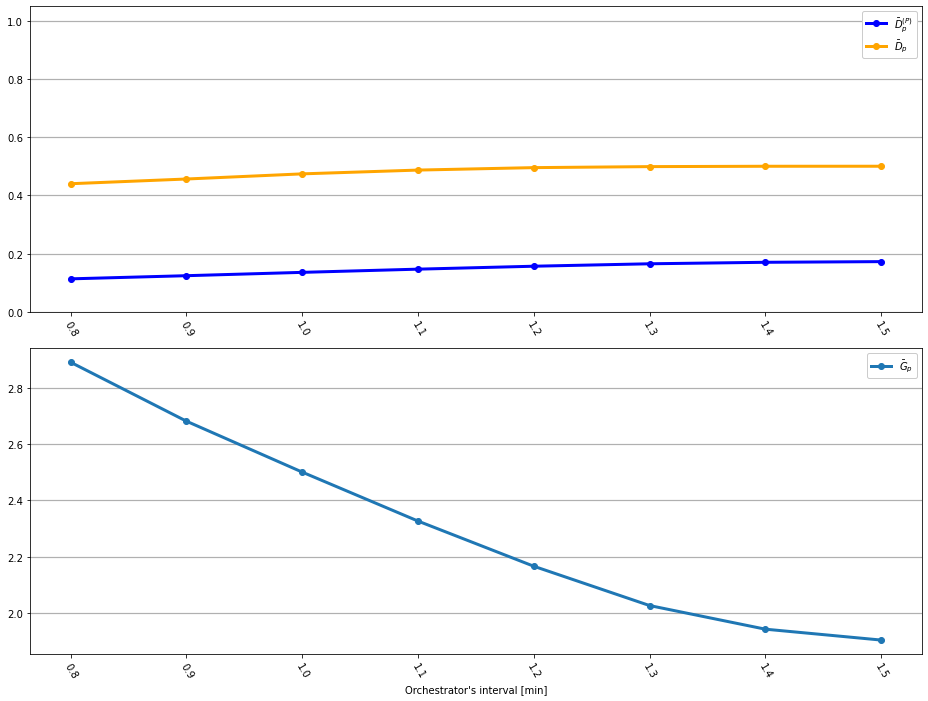

In [46]:
Tadm_Plotter(Ctots,NET_GAIN_SP_qlists_means,NET_GAIN_OB_qlists_means,Net_Ben_OPT_List_SP_q_lists,Net_Ben_OPT_List_OB_q_lists,typess='p',Experiment=Experiment)
#plt.savefig(f'{Filesave}/Tadm_Plot_p.png',dpi=300)
#savefigs_all_formats(Filesave,'Tadm_Plot_p')